Clasificador de jugadores de baloncesto
Objetivo del ejercicio:

Tu misión es construir un modelo inteligente que clasifique a jugadores de baloncesto según su rendimiento en tres categorías: "Bajo", "Medio" y "Alto", utilizando para ello sus características físicas y estadísticas de juego.

Usarás el algoritmo de árboles de decisión junto con NumPy, pandas, matplotlib y scikit-learn.



🎯 Contexto del problema

Un equipo de baloncesto ficticio está evaluando a nuevos jugadores y necesita una herramienta que, a partir de la altura, el peso y el promedio de puntos por partido, determine automáticamente el nivel de rendimiento del jugador.

Esta herramienta será clave para seleccionar a los mejores candidatos.



🧱 Estructura sugerida de la solución

1. BasketballPlayer

Una clase que representa a cada jugador. Sus atributos son:

height (int): altura en centímetros.

weight (int): peso en kilogramos.

avg_points (float): promedio de puntos por partido.

performance (str): nivel de rendimiento, con valores "Bajo", "Medio" o "Alto".

Método útil:

to_vector(): devuelve [height, weight, avg_points] para ser usado por el modelo.



2. BasketballDataGenerator

Una clase que genera datos sintéticos simulando jugadores reales.

Método clave:

generate(): devuelve una lista de objetos BasketballPlayer. La clasificación se basa en el promedio de puntos:

Menos de 8 puntos → "Bajo"

Entre 8 y 15 puntos → "Medio"

Más de 15 puntos → "Alto"



3. BasketballPerformanceClassifier

Encapsula el modelo de árbol de decisión. Métodos clave:

fit(players): entrena el modelo con una lista de jugadores.

predict(height, weight, avg_points): predice el rendimiento de un nuevo jugador.

evaluate(players): imprime la matriz de confusión y el informe de clasificación sobre un conjunto de prueba.



4. BasketballPredictionExample

Contiene el flujo principal:

Generar datos.

Dividirlos en entrenamiento y prueba.

Entrenar y evaluar el clasificador.

Hacer una predicción para un nuevo jugador (por ejemplo: altura = 198 cm, peso = 92 kg, puntos = 17).

Visualizar los jugadores usando matplotlib, diferenciando el rendimiento por colores.



📊 Visualización esperada

Un gráfico de dispersión donde cada punto representa un jugador.

El eje X muestra la altura y el eje Y el promedio de puntos.

El color indica el rendimiento:

🔴 Bajo

🟠 Medio

🟢 Alto



✅ Requisitos técnicos

Usa NumPy para generar datos aleatorios.

Usa pandas para crear el DataFrame de visualización.

Usa DecisionTreeClassifier de sklearn.tree.

Representa visualmente los datos con matplotlib.



🧪 Ejemplo de uso

example = BasketballPredictionExample()
example.run()


Salida esperada

Confusion Matrix:
[[10  0  0]
 [ 0 23  0]
 [ 0  0 27]]
 
Classification Report:
              precision    recall  f1-score   support
 
        Alto       1.00      1.00      1.00        10
        Bajo       1.00      1.00      1.00        23
       Medio       1.00      1.00      1.00        27
 
    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60
 
 
🎯 Predicción personalizada → Altura: 198 cm, Peso: 92 kg, Prom. puntos: 17
   → Categoría predicha: Alto








📊 Evaluación del modelo:

🔴 Matriz de Confusión:
[[13  0  0]
 [ 0  9  1]
 [ 0  0  7]]

📝 Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00        13
        Bajo       1.00      0.90      0.95        10
       Medio       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


🔮 Predicción personalizada: 
   → Altura: 198 cm | Peso: 92 kg | Promedio de puntos: 17
   → Categoría predicha: ✅ Alto



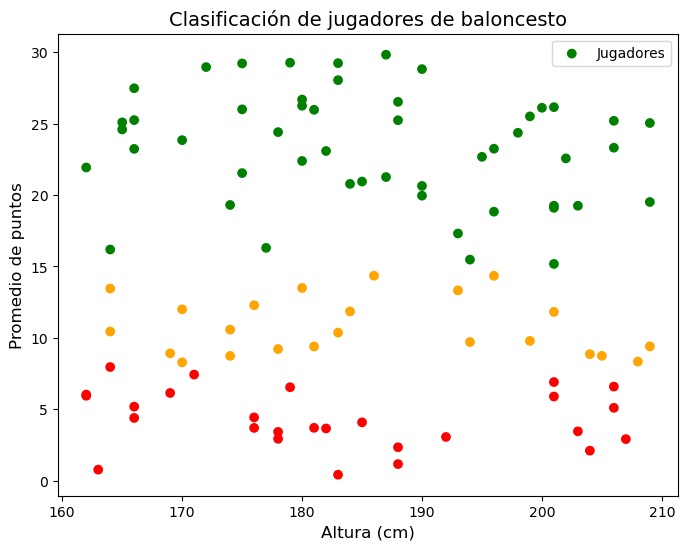

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

class BasketballPlayer:
    def __init__(self, height, weight, avg_points, performance=None):
        self.height = height
        self.weight = weight
        self.avg_points = avg_points
        self.performance = performance
    
    def to_vector(self):
        return [self.height, self.weight, self.avg_points]


class BasketballDataGenerator:
    def __init__(self, num_samples=100):
        self.num_samples = num_samples

    def generate(self):
        players = []
        for _ in range(self.num_samples):
            height = np.random.randint(160, 210)
            weight = np.random.randint(50, 120)
            avg_points = np.random.uniform(0, 30)

            if avg_points < 8:
                performance = "Bajo"
            elif 8 <= avg_points <= 15:
                performance = "Medio"
            else:
                performance = "Alto"
            
            players.append(BasketballPlayer(height, weight, avg_points, performance))
        return players


class BasketballPerformanceClassifier:
    def __init__(self):
        self.model = DecisionTreeClassifier()
    
    def fit(self, players):
        X = [player.to_vector() for player in players]
        y = [player.performance for player in players]
        self.model.fit(X, y)
    
    def predict(self, height, weight, avg_points):
        return self.model.predict([[height, weight, avg_points]])[0]
    
    def evaluate(self, players):
        X = [player.to_vector() for player in players]
        y_true = [player.performance for player in players]
        y_pred = self.model.predict(X)

        print("\n📊 Evaluación del modelo:")
        print("\n🔴 Matriz de Confusión:")
        print(confusion_matrix(y_true, y_pred))
        
        print("\n📝 Reporte de Clasificación:")
        print(classification_report(y_true, y_pred))


class BasketballPredictionExample:
    def run(self):
        # Generar datos
        generator = BasketballDataGenerator(num_samples=100)
        players = generator.generate()

        # Dividir los datos en entrenamiento y prueba
        train_players, test_players = train_test_split(players, test_size=0.3, random_state=42)

        # Entrenar el clasificador
        classifier = BasketballPerformanceClassifier()
        classifier.fit(train_players)

        # Evaluar el clasificador
        classifier.evaluate(test_players)

        # Predicción personalizada
        height, weight, avg_points = 198, 92, 17
        predicted_performance = classifier.predict(height, weight, avg_points)
        
        print(f"\n🔮 Predicción personalizada: ")
        print(f"   → Altura: {height} cm | Peso: {weight} kg | Promedio de puntos: {avg_points}")
        print(f"   → Categoría predicha: {self.format_prediction(predicted_performance)}\n")

        # Visualización
        self.visualize(players)

    def format_prediction(self, performance):
        """Devuelve el formato adecuado para la categoría predicha."""
        if performance == "Bajo":
            return f"❌ {performance}"
        elif performance == "Medio":
            return f"⚠️ {performance}"
        else:
            return f"✅ {performance}"

    def visualize(self, players):
        heights = [player.height for player in players]
        avg_points = [player.avg_points for player in players]
        performance = [player.performance for player in players]
        
        color_map = {"Bajo": "red", "Medio": "orange", "Alto": "green"}
        colors = [color_map[performance[i]] for i in range(len(players))]

        plt.figure(figsize=(8, 6))
        plt.scatter(heights, avg_points, c=colors, label="Jugadores")
        plt.xlabel("Altura (cm)", fontsize=12)
        plt.ylabel("Promedio de puntos", fontsize=12)
        plt.title("Clasificación de jugadores de baloncesto", fontsize=14)
        plt.legend()
        plt.show()


# Ejecutar el ejemplo
example = BasketballPredictionExample()
example.run()
